![CNN](https://miro.medium.com/v2/resize:fit:1400/1*Q6yA_1B_vsdGWAAwB8Z7rA.png)

# 🧠👟 Image Recognition with CNNs — Classifying Fashion Like a Pro!

> **Can a machine learn to recognize T-shirts, sneakers, and coats — just by looking at pixels?**  
Welcome to your beginner-friendly introduction to **Convolutional Neural Networks (CNNs)** — the powerhouse behind modern computer vision.  
In this notebook, we’ll apply CNNs step-by-step using the **Fashion-MNIST dataset**, a cleaner and more challenging upgrade to the classic MNIST digits dataset.

Whether you're a student taking your first steps in deep learning, a Kaggle explorer, or a curious learner — this notebook is designed to help you **build, train, evaluate, and visualize** a CNN from scratch using **TensorFlow & Keras**.

---
# 🧑‍💻 **About the Author**

Hi, I’m **Asadullah Shehbaz** — an aspiring Data Scientist passionate about uncovering insights through data.  
I'm on a journey to master machine learning, analytical thinking, and real-world problem solving, one project at a time.

> *“I believe community drives innovation — by learning together, we grow faster, think deeper, and build stronger solutions.”*

Feel free to connect, share feedback, or explore my other notebooks below! 👇

---

### 🌐 **Contact & Profiles**

| 📛 Name | 📧 Email | 🔗 LinkedIn | 💻 GitHub | 🧠 Kaggle |
|--------|----------|-------------|------------|-----------|
| **Asadullah Shehbaz** | asadullahcreative@gmail.com | [![LinkedIn Badge](https://img.shields.io/badge/-LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/asadullah-shehbaz-18172a2bb/) | [![GitHub Badge](https://img.shields.io/badge/-GitHub-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/AsadullahShehbaz) | [![Kaggle Badge](https://img.shields.io/badge/-Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/asadullahcreative) |

---



---
# 🧰 What You’ll Learn

- What CNNs are and how they mimic human vision 🧠👀  
- How to preprocess image data for deep learning  
- How to build a CNN model using **Keras Sequential API**  
- How to visualize model performance and predictions  
- Optional: How to *peek inside* the network to see what it’s learning!

---

## 📦 Dataset: Fashion-MNIST

- 70,000 grayscale images (28×28 pixels)  
- 10 fashion categories (e.g., shirt, sneaker, bag)  
- Built-in access via `tensorflow.keras.datasets` (no downloads needed!)

---

> 🧠 **Fun Fact**: CNNs are used in facial recognition, autonomous vehicles, medical image diagnosis, and even in your phone’s camera app!

---

## 🚀 Let’s Get Started

> 🎯 *By the end of this notebook, you’ll not only understand CNNs — you’ll have built one yourself that can classify fashion items with over 85% accuracy.*


# 📦 1. Load the Dataset & Libraries

In [1]:
# Basic imports
# ----------------------------
# numpy: For numerical operations on arrays
import numpy as np
# matplotlib: For data visualization and plotting
import matplotlib.pyplot as plt

# Importing from Keras (TensorFlow's high-level API)
# ----------------------------
# fashion_mnist: The dataset we'll use (clothing images)
from tensorflow.keras.datasets import fashion_mnist
# to_categorical: Converts labels to one-hot encoding format
from tensorflow.keras.utils import to_categorical
# Sequential: The type of model we'll build (linear stack of layers)
from tensorflow.keras.models import Sequential

# Keras layer types we'll use:
# ----------------------------
# Conv2D: 2D convolution layer (the core of CNNs)
# MaxPooling2D: Reduces spatial dimensions (downsamples)
# Flatten: Converts 2D features to 1D for dense layers
# Dense: Regular fully-connected neural network layer
# Dropout: Helps prevent overfitting by randomly ignoring neurons
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# EarlyStopping: Stops training when model stops improving
from tensorflow.keras.callbacks import EarlyStopping

2025-07-04 11:59:54.193377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751630394.451321      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751630394.530539      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 🧵 About Fashion-MNIST Dataset

### What is Fashion-MNIST?

Fashion-MNIST is a popular **benchmark dataset** for machine learning, designed as a more challenging alternative to the classic MNIST digit dataset. It contains:

- **70,000 grayscale images** (28×28 pixels each)
- **10 categories** of clothing/accessories
- **Pre-split** into:
  - 60,000 training images
  - 10,000 test images

> 🌟 **Fun Fact**: Each image is a product from Zalando's e-commerce catalog!

---

### Class Labels (0-9)

| Label | Category      | Example       | Label | Category     | Example       |
|-------|---------------|---------------|-------|--------------|---------------|
| 0     | T-shirt/top   | 👕            | 5     | Sandal       | 👡            |
| 1     | Trouser       | 👖            | 6     | Shirt        | 👔            |
| 2     | Pullover      | �             | 7     | Sneaker      | 👟            |
| 3     | Dress         | 👗            | 8     | Bag          | 👜            |
| 4     | Coat          | 🧥            | 9     | Ankle boot   | 👢            |

---

### Why Use Fashion-MNIST?

1. **Beginner-Friendly**  
   - Simple 28×28 grayscale format (easier than color images)
   - Balanced classes (6,000 examples per category)

2. **Good CNN Practice**  
   - More complex than digits but manageable for beginners
   - Tests if models can learn **textures and shapes**

3. **Fast to Train**  
   - Small image size = quick model experimentation

---


### Key Challenges

🔍 **Similar-Looking Classes**  
   - Shirts vs. T-shirts vs. Pullovers  
   - Sneakers vs. Ankle boots  

🎯 **Model Must Learn**:  
   - Fine details (sleeve length, collar type)  
   - Spatial hierarchies (patterns → shapes → objects)  

> 💡 We'll tackle these with **Convolutional Neural Networks (CNNs)**!

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Print shapes of the loaded data
print(f"Training data shape: {x_train.shape}")  # Should show (60000, 28, 28)
print(f"Training labels shape: {y_train.shape}")  # Should show (60000,)
print(f"Test data shape: {x_test.shape}")  # Should show (10000, 28, 28)
print(f"Test labels shape: {y_test.shape}")  # Should show (10000,)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


# 🧹 2. Data Preprocessing

### 1. Pixel Normalization
- Neural networks prefer small input values (0-1 range) for stable training
- Prevents large pixel values (0-255) from dominating learning


In [3]:
# Normalise to [0,1]
x_train = x_train.astype("float32") / 255.
x_test  = x_test.astype("float32")  / 255.

### 2. Channel Dimension Addition
- CNNs expect (batch, height, width, channels) format
- Grayscale images need explicit color dimension
- Transforms shape from (n, 28, 28) → (n, 28, 28, 1)


In [4]:
x_train = x_train[..., np.newaxis]  # Shape: (60000, 28, 28) → (60000, 28, 28, 1)
x_test = x_test[..., np.newaxis]

### 3. One-Hot Encode Labels
- Converts class labels (e.g., "3") → binary vectors
- Example: 3 → [0,0,0,1,0,0,0,0,0,0]
- Required for categorical crossentropy loss

In [5]:
# One‑hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


# 🧠 3. Build the CNN 

#### 🧩 CNN Building Blocks

| Layer              | Function                              | Why It Matters                       |
|--------------------|---------------------------------------|--------------------------------------|
| 🔍 `Conv2D`        | Scans for patterns (edges → objects)  | Core feature detection               |
| 📉 `MaxPooling2D`  | Shrinks feature maps                  | Saves computation, keeps key features|
| 🎲 `Dropout`       | Randomly disables neurons (p=0.2)     | Forces robust feature learning       |
| ➡️ `Flatten`       | Converts to 1D vector                 | Prepares for final classification    |
| 🎯 `Dense`         | Makes predictions                     | Outputs class probabilities          |



In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), 
    MaxPooling2D(2,2), # maxpooling is used to reduce the size of the image from 28x28 to 14x14

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2), # maxpooling is used to reduce the size of the image from 14x14 to 7x7

    Flatten(), # flattens the image to a 1D array
    Dense(128, activation='relu'), # dense layer with 128 neurons
    Dropout(0.30), # dropout is used to prevent overfitting
    Dense(10, activation='softmax') # output layer with 10 neurons and softmax activation function
])

model.summary() # print a summary of the model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-04 12:00:14.000415: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# 🚀 4. Compile & Train

In [7]:
# Compile the model
# - optimizer: 'adam' helps the model learn efficiently
# - loss: 'categorical_crossentropy' is good for multi-class classification
# - metrics: ['accuracy'] will show how often predictions are correct
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set up EarlyStopping to stop training if the model doesn't improve for 3 epochs
# - patience=3: Wait for 3 epochs with no improvement before stopping
# - restore_best_weights=True: Go back to the best model weights
# - verbose=1: Print messages when stopping
early_stop = EarlyStopping(
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Train the model and save the training history
# - x_train, y_train: Training data and labels
# - validation_split=0.2: Use 20% of training data for validation
# - epochs=5: Train for up to 5 times through the data
# - batch_size=128: Use 128 samples at a time for training
# - callbacks=[early_stop]: Use early stopping to avoid overfitting
# - verbose=2: Print training progress
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=128,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/5
375/375 - 21s - 55ms/step - accuracy: 0.7706 - loss: 0.6287 - val_accuracy: 0.8487 - val_loss: 0.4149
Epoch 2/5
375/375 - 18s - 47ms/step - accuracy: 0.8569 - loss: 0.4012 - val_accuracy: 0.8682 - val_loss: 0.3710
Epoch 3/5
375/375 - 18s - 48ms/step - accuracy: 0.8735 - loss: 0.3468 - val_accuracy: 0.8829 - val_loss: 0.3174
Epoch 4/5
375/375 - 20s - 54ms/step - accuracy: 0.8834 - loss: 0.3142 - val_accuracy: 0.8857 - val_loss: 0.3043
Epoch 5/5
375/375 - 18s - 47ms/step - accuracy: 0.8934 - loss: 0.2904 - val_accuracy: 0.9003 - val_loss: 0.2765
Restoring model weights from the end of the best epoch: 5.


# 📊 5. Evaluate & Plot Curves

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8956 - loss: 0.2960
✅ Test Accuracy: 0.8963


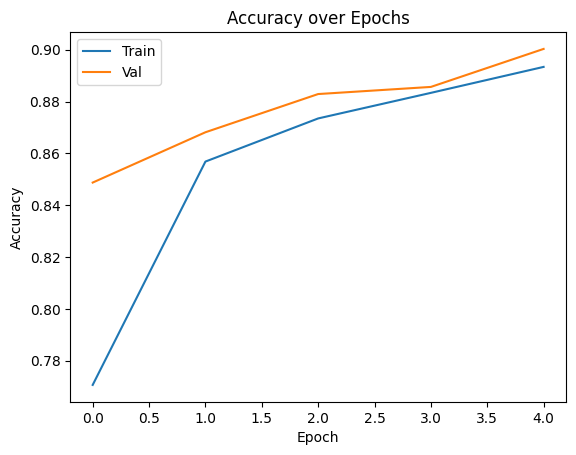

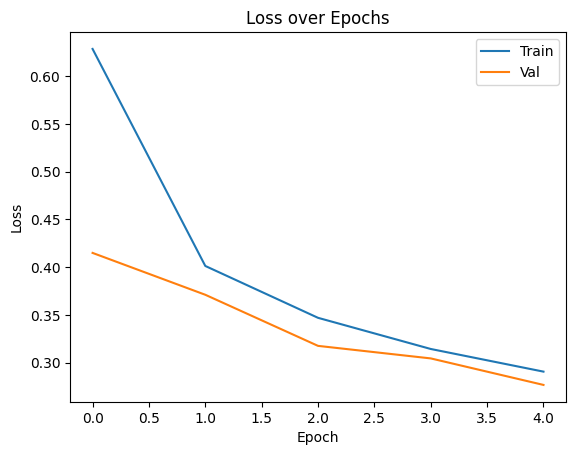

In [8]:
# Test-set evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# Accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy over Epochs'); 
plt.xlabel('Epoch'); 
plt.ylabel('Accuracy')
plt.legend(); 
plt.show()

# Loss curve
plt.figure()
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss over Epochs'); 
plt.xlabel('Epoch'); 
plt.ylabel('Loss')
plt.legend(); 
plt.show()


# 👀 6. Visualise Random Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


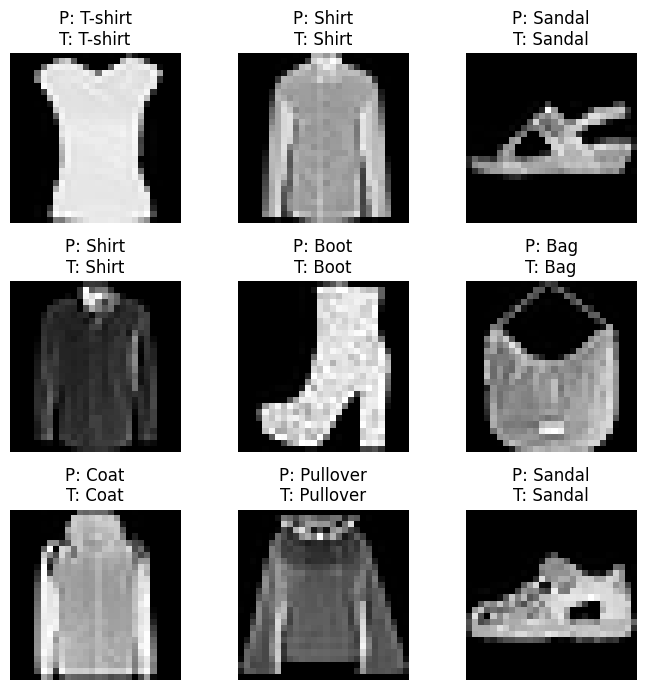

In [9]:
# List of class names for the Fashion MNIST dataset
class_names = [
    'T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot'
]

# Randomly select 9 image indices from the test set
# len(x_test) gives the total number of test images
# np.random.choice picks 9 unique random indices
random_indices = np.random.choice(len(x_test), 9, replace=False)

# Create a new figure for plotting images (size 7x7 inches)
plt.figure(figsize=(7, 7))

# Loop through each selected index and plot the image
for i, idx in enumerate(random_indices):
    # Get the image from the test set
    img = x_test[idx]
    # Predict the class for this image using the trained model
    # img[np.newaxis, ...] adds a batch dimension to the image (1, 28, 28, 1)
    prediction = model.predict(img[np.newaxis, ...])
    predicted_class = np.argmax(prediction) # get the index of the predicted class
    # Get the true class label for this image
    true_class = np.argmax(y_test[idx])

    # Create a subplot (3 rows, 3 columns, position i+1)
    plt.subplot(3, 3, i + 1)
    # Show the image in grayscale
    # img.squeeze() removes the batch dimension from the image
    plt.imshow(img.squeeze(), cmap='gray')
    # Set the title as Predicted and True class names
    plt.title(f"P: {class_names[predicted_class]}\nT: {class_names[true_class]}")
    # Hide the axis ticks
    plt.axis('off')

# Adjust layout so titles and images don't overlap
plt.tight_layout()
# Display the plot with all 9 images
plt.show()


# 💾 Save Model

In [10]:
# Save the trained model to a file named 'fashion_mnist_cnn.h5'
# This allows you to reuse the model later without retraining
model.save('fashion_mnist_cnn.h5')

# Print a message to confirm the model was saved
print("Model saved ⬆️ successfully")


Model saved ⬆️ successfully


---

# **Conclusion**  

Thank you for taking the time to explore this notebook! I hope this guide has been insightful in helping you understand **Convolutional Neural Networks (CNNs)** better. If you found this notebook useful, please consider:  

- **⭐ Upvoting** – This motivates me to create more high-quality content!  
- **💬 Leaving a comment** – Feedback, questions, or suggestions are always welcome!  
- **📌 Forking/Running the notebook** – Experiment with the code and make it your own!  

Let’s keep learning and growing together in the Kaggle community. Happy coding! 🎉    